In [8]:
import tensorflow as tf

In [9]:
x = tf.ones(shape=(2, 1)) # 1로 초기화
print(x)

x = tf.zeros(shape=(2, 1)) #0으로 초기화
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [10]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) # 평균이 0이고 표준 편차가 1인 정규 분포(normal distribution)에서 뽑은 랜덤한 값으로 만든 텐서
print(x)

tf.Tensor(
[[-1.108701  ]
 [-0.5004986 ]
 [ 0.11690418]], shape=(3, 1), dtype=float32)


In [11]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) # 0과 1 사이의 균등 분포(uniform distribution)에서 뽑은 랜덤한 값으로 만든 텐서
print(x)

tf.Tensor(
[[0.3025924 ]
 [0.8307661 ]
 [0.10467255]], shape=(3, 1), dtype=float32)


In [12]:
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0. # 넘파이는 값 대입 가능(변수)

In [13]:
x = tf.ones(shape=(2,2))
x[0, 0] = 0. # 텐서는 상수

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.67484695],
       [ 0.18588382],
       [ 0.44192004]], dtype=float32)>


In [ ]:
v.assign(tf.ones(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [ ]:
# 변수의 일부 원소에만 적용할 수 있음
v[0, 0].assign(3.)
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>


In [ ]:
# +=, -=과 동일
v.assign_add(tf.ones(shape=(3,1)))
print(v)

v.assign_sub(tf.ones(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[5.],
       [3.],
       [3.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>


In [ ]:
a = tf.ones((2, 2))

# 제곱 계산
b =tf.square(a)

# 제곱근 계산
c = tf.sqrt(a)

# 두 텐서를 더함 (원소별 연산)
d = b + c

# 두 텐서의 점곱을 계산
e = tf.matmul(a, b)

# 두 텐서를 곱함 (원소별 연산)
f = a * b

In [15]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape :
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [16]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [20]:
# 속도 및 가속도 그레이디언트 계산
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape :
    with tf.GradientTape() as inner_tape :
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

print(speed)
print(acceleration)

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [27]:
num_samples_per_class = 1000

# 첫 번째 클래스의 포인트를 생성
# 100개의 랜덤한 왼쪽 아래에서 오른쪽 위로 향하는 타원형의 포인트 클라우드
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov = [[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

# 동일한 공분산 행렬과 다른 평균을 사용하여 다른 클래스의 포인트를 생성
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov = [[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)

print(negative_samples)

print(positive_samples)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# 0으로 이루어진 벡터 1000개와 1로 이루어진 벡터 1000개를 이어 2000개의 벡터로 이루어진 label targets 생성
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'), 
                     np.ones((num_samples_per_class, 1), dtype='float32')))

[[ 0.17058447  2.612153  ]
 [ 0.73001165  2.19749301]
 [-0.8814753   1.87322021]
 ...
 [-1.43548147  3.41973732]
 [-1.11045089  3.83243152]
 [ 0.10981734  3.49725903]]
[[ 3.2949492  -0.9754529 ]
 [ 3.40360134 -1.49727051]
 [ 3.72912795 -0.80238578]
 ...
 [ 3.78235454  1.25318596]
 [ 2.08680647  0.47917396]
 [ 3.11242056 -0.16689313]]


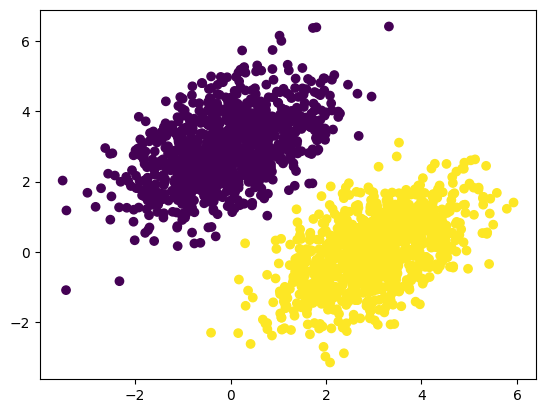

In [28]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [34]:
input_dim = 2
output_dim = 1
# 가중치를 랜덤한 값으로 생성
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
# bias를 0으로 초기화
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [35]:
# 정방향 패스
def model(inputs) :
    return tf.matmul(inputs, W) + b
# 예측 값을 구해서 반환

In [36]:
def sqaure_loss(targets, predictions) :
    per_sample_losses = tf.square(targets - predictions) # targets나 predictions와 같은 크기를 가진 텐서이며 손실 값을 저장
    return tf.reduce_mean(per_sample_losses) # 샘플 당 손실 값을 하나의 스칼라 손실 값으로 평균
# 손실 값을 구해서 반환

In [37]:
learning_rate = 0.1

def training_step(inputs, targets) :
    with tf.GradientTape() as tape :
        predictions = model(inputs) # 예측
        loss = sqaure_loss(targets, predictions) # 손실
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) # 가중치에 대한 손실의 그래이디언트
    W.assign_sub(grad_loss_wrt_W * learning_rate) # 가중치 업데이트
    b.assign_sub(grad_loss_wrt_b * learning_rate) # bias 업데이트
    return loss

In [38]:
for step in range(40) :
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 2.8146
1번째 스텝의 손실: 0.3123
2번째 스텝의 손실: 0.1414
3번째 스텝의 손실: 0.1153
4번째 스텝의 손실: 0.1055
5번째 스텝의 손실: 0.0981
6번째 스텝의 손실: 0.0915
7번째 스텝의 손실: 0.0856
8번째 스텝의 손실: 0.0801
9번째 스텝의 손실: 0.0751
10번째 스텝의 손실: 0.0706
11번째 스텝의 손실: 0.0665
12번째 스텝의 손실: 0.0628
13번째 스텝의 손실: 0.0594
14번째 스텝의 손실: 0.0562
15번째 스텝의 손실: 0.0534
16번째 스텝의 손실: 0.0508
17번째 스텝의 손실: 0.0485
18번째 스텝의 손실: 0.0463
19번째 스텝의 손실: 0.0444
20번째 스텝의 손실: 0.0426
21번째 스텝의 손실: 0.0410
22번째 스텝의 손실: 0.0395
23번째 스텝의 손실: 0.0382
24번째 스텝의 손실: 0.0370
25번째 스텝의 손실: 0.0359
26번째 스텝의 손실: 0.0349
27번째 스텝의 손실: 0.0339
28번째 스텝의 손실: 0.0331
29번째 스텝의 손실: 0.0323
30번째 스텝의 손실: 0.0316
31번째 스텝의 손실: 0.0310
32번째 스텝의 손실: 0.0304
33번째 스텝의 손실: 0.0299
34번째 스텝의 손실: 0.0294
35번째 스텝의 손실: 0.0290
36번째 스텝의 손실: 0.0286
37번째 스텝의 손실: 0.0282
38번째 스텝의 손실: 0.0279
39번째 스텝의 손실: 0.0276


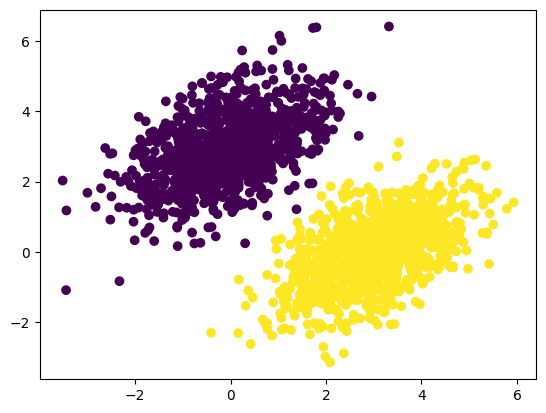

In [40]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()

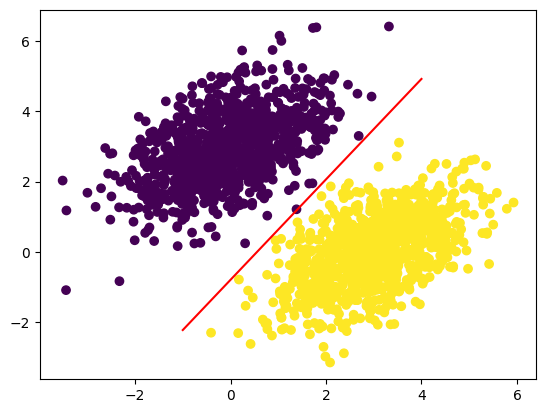

In [41]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 -b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.show()